## Table of Contents
- [Data Load](#Data-Load)
- [Data Processing](#Data-Processing)
- [Numerical Features](#numerical-features)
- [- EDA](##EDA)
- [- Skewness](##Skewness)
- [- Scaling](##Scaling)

# --------------------------------------------------------
# Data Load

lets use car data.csv

In [209]:
# IMPORT ALL PACKAGES
import numpy as np 
import pandas as pd
import datetime as dt

from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
# Load Dataset
df = pd.read_csv('../src/data/car_data.csv')

# Preview the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [211]:
# Basic Information
# Provide a list of the DataFrame columns and the data types in each of the columns.display(df.info())
display(df.info())

# you can see there are 301 entries
# and 301 non null entries
# so there are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


None

In [212]:
# drop rows with missing values
df.dropna(inplace=True)

# Feature Descriptions
# Extract various descriptive statistics from the dataset
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


# --------------------------------------------------------
# Data Processing

#### Feature Transformation - Year

"Year" shows the car model year. We can replace this column with the cars age attribute.To calculate the age, we consider the origin time to be 1 year older than the maximum model year:

In [213]:
# Add a new feature called Age calculated from Year
year_ = dt.datetime.now().year

# Create a new column 'Age' by subtracting the 'Year' column from the current year
df_ = df.assign(Age = year_ - df['Year'])

# Drop the year column
df_.drop('Year', axis=1, inplace=True)

# move the `Age` column to the second position
df_.insert(1, 'Age', df_.pop('Age'))

print("Original Vs. New DataFrame:")
display(df.head())
display(df_.head())

print("Original DataFrame:")
display(df.describe().T)
display(df_.describe().T)

df = df_.copy()


Original Vs. New DataFrame:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


,Car_Name,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,11,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,12,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,8,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,14,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,11,4.60,6.87,42450,Diesel,Dealer,Manual,0


Original DataFrame:


,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


,count,mean,std,min,25%,50%,75%,max
Age,301.0,11.372093,2.891554,7.00,9.0,11.0,13.0,22.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


#### Feature Selection

Since Car_Name contains 98 unique categories, and this number of categories is very high compared to the number of dataset samples, it is better to drop it:

In [214]:
df.drop('Car_Name', axis=1, inplace=True)
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,11,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,12,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,8,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,14,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,11,4.60,6.87,42450,Diesel,Dealer,Manual,0


We can determine which are the numerical and categorical features:

In [215]:
output_var = 'Selling_Price'
numeric_data = df.select_dtypes(include=['number']).columns.tolist()
numeric_features = [col for col in numeric_data if col != output_var]
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'Numeric Features    : {numeric_features}')
print(f'Categorical Features: {categorical_features}')

Numeric Features    : ['Age', 'Present_Price', 'Kms_Driven', 'Owner']
Categorical Features: ['Fuel_Type', 'Seller_Type', 'Transmission']


# --------------------------------------------------------
# Numerical Features

In [216]:
print(f'Numeric Features    : {numeric_features}')
print(f'target variable       : {output_var}')

# display the numeric features and output variable
display(df[numeric_features + [output_var]].head())

Numeric Features    : ['Age', 'Present_Price', 'Kms_Driven', 'Owner']
target variable       : Selling_Price


,Age,Present_Price,Kms_Driven,Owner,Selling_Price
0,11,5.59,27000,0,3.35
1,12,9.54,43000,0,4.75
2,8,9.85,6900,0,7.25
3,14,4.15,5200,0,2.85
4,11,6.87,42450,0,4.60


## EDA

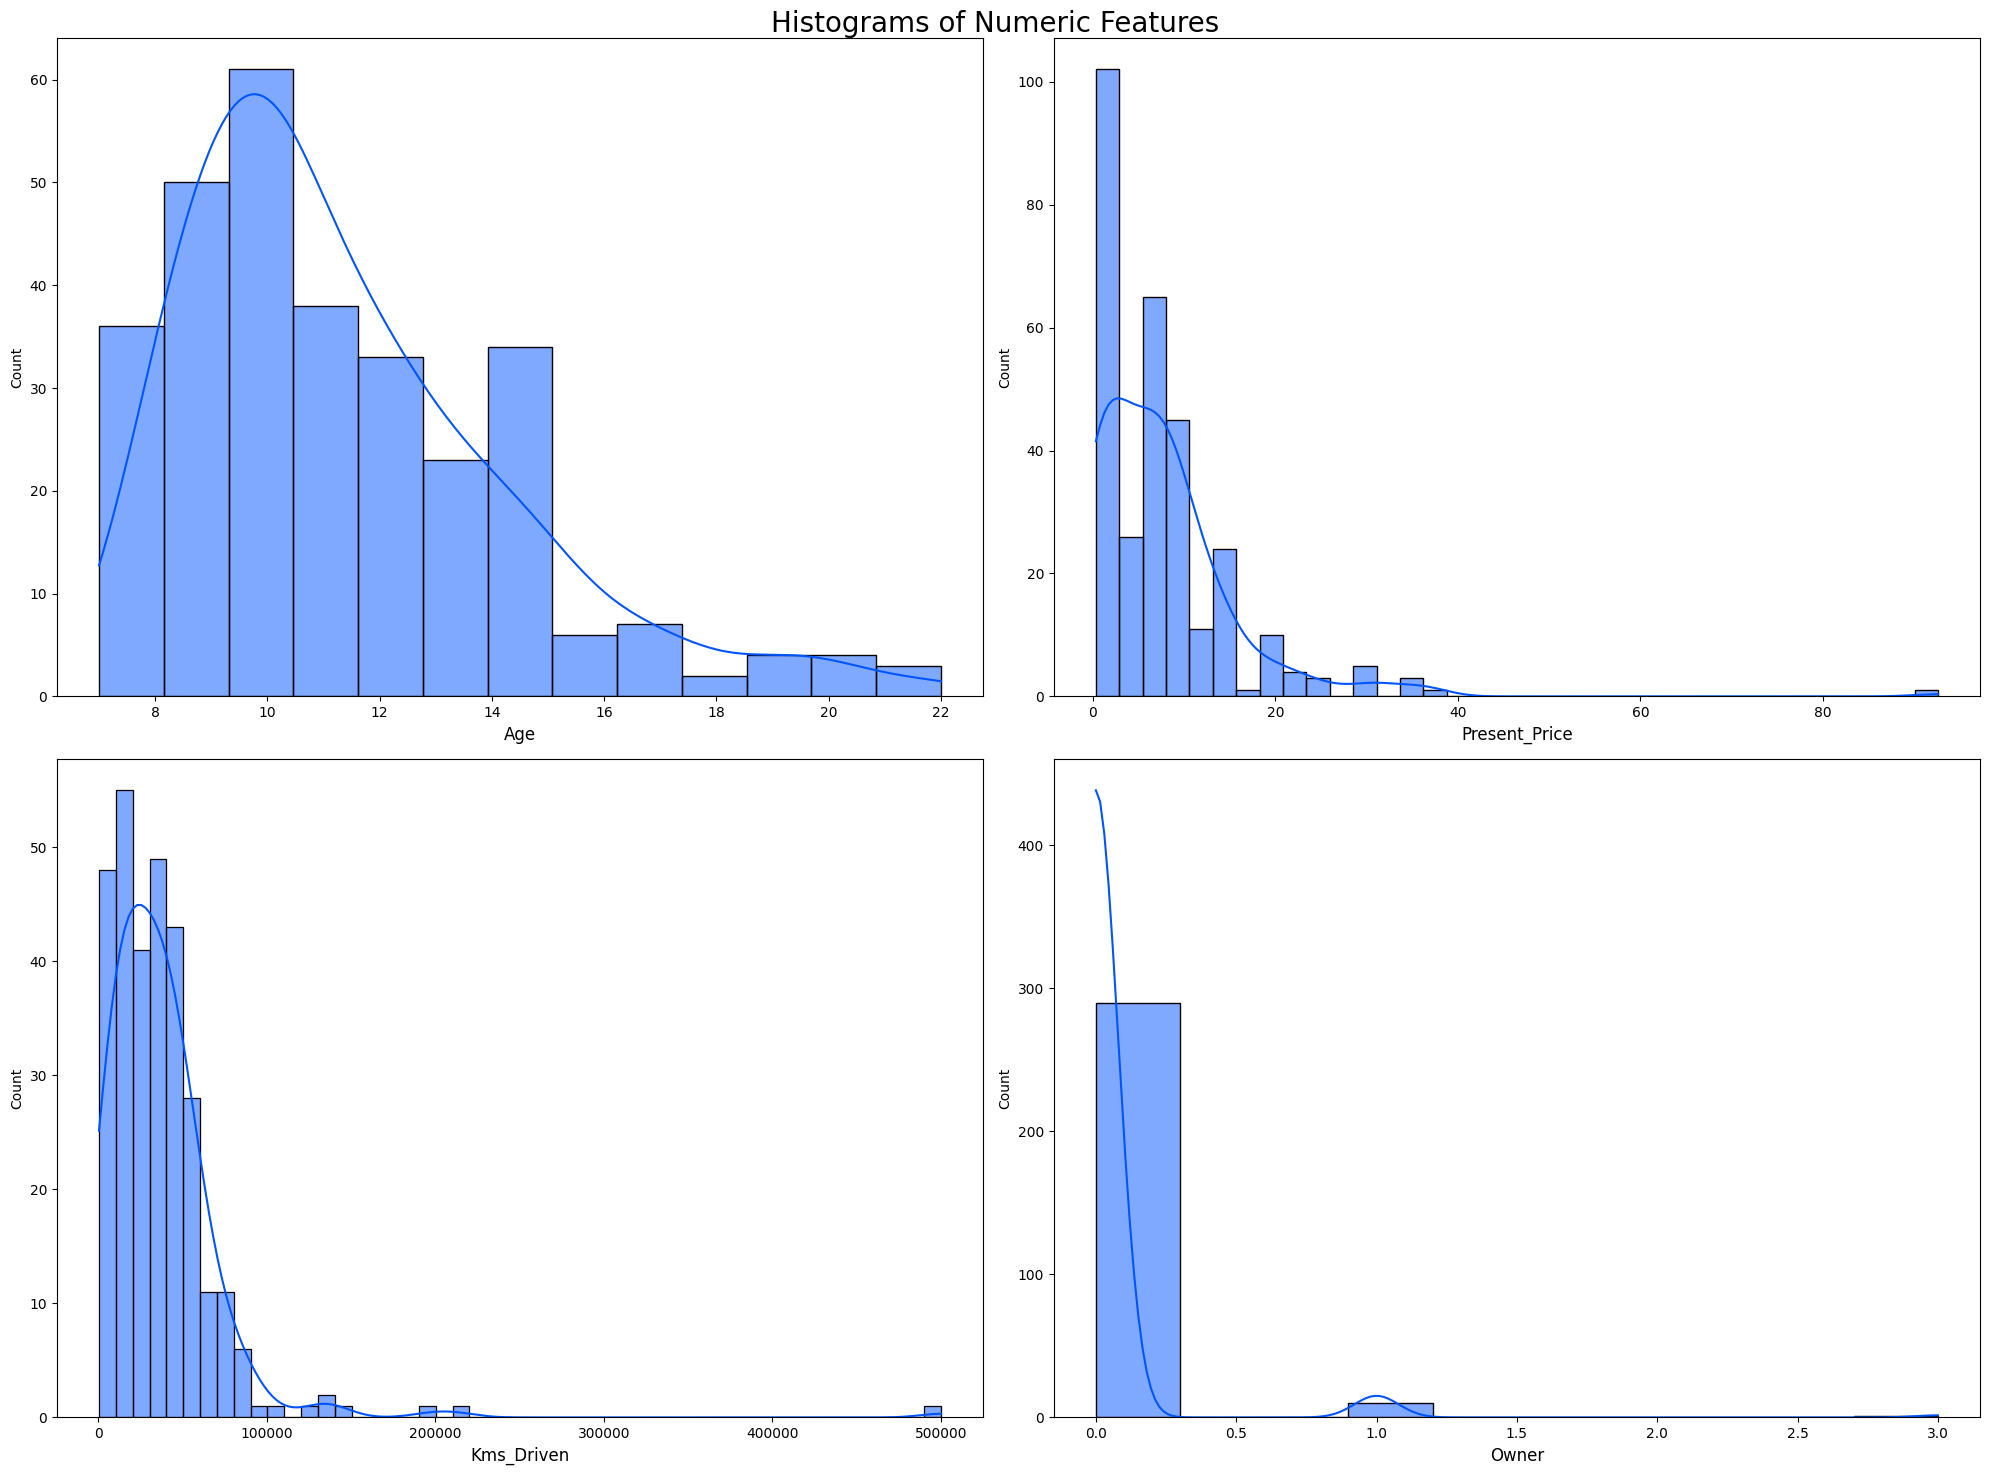

In [217]:
# Histograms of Numeric Features
plt.figure(figsize=(20, 15))
plt.suptitle('Histograms of Numeric Features', fontsize=20)

for i, col in enumerate(df[numeric_features].columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.xlabel(col, fontsize=12)
plt.tight_layout()
plt.show()

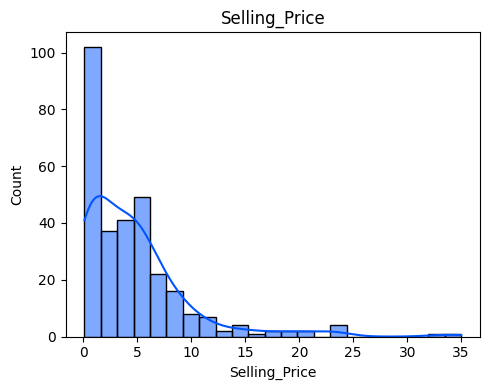

In [218]:
# plot of the target variable
plt.figure(figsize=(5, 4))
sns.histplot(df[output_var], kde=True)
plt.title(output_var)
plt.tight_layout()
plt.show()

# --------------------------------------------------------
## Skewness

Skewness Transform

In [219]:
# All the numeric data is right skewed.
# if the skew level is > 1 then it is right skewed

for col in numeric_data:
    print(f'{col} = {df[col].skew()}')

df[numeric_data].head()

Age = 1.2461891109537495
Selling_Price = 2.493422417797524
Present_Price = 4.083150156592918
Kms_Driven = 6.436012679752193
Owner = 7.616849679389442


,Age,Selling_Price,Present_Price,Kms_Driven,Owner
0,11,3.35,5.59,27000,0
1,12,4.75,9.54,43000,0
2,8,7.25,9.85,6900,0
3,14,2.85,4.15,5200,0
4,11,4.60,6.87,42450,0


Age = 0.07320690666571263
Selling_Price = 0.01653014435685836
Present_Price = -0.0069110872764610596
Kms_Driven = 0.07953227711071613
Owner = 4.9645689710476955


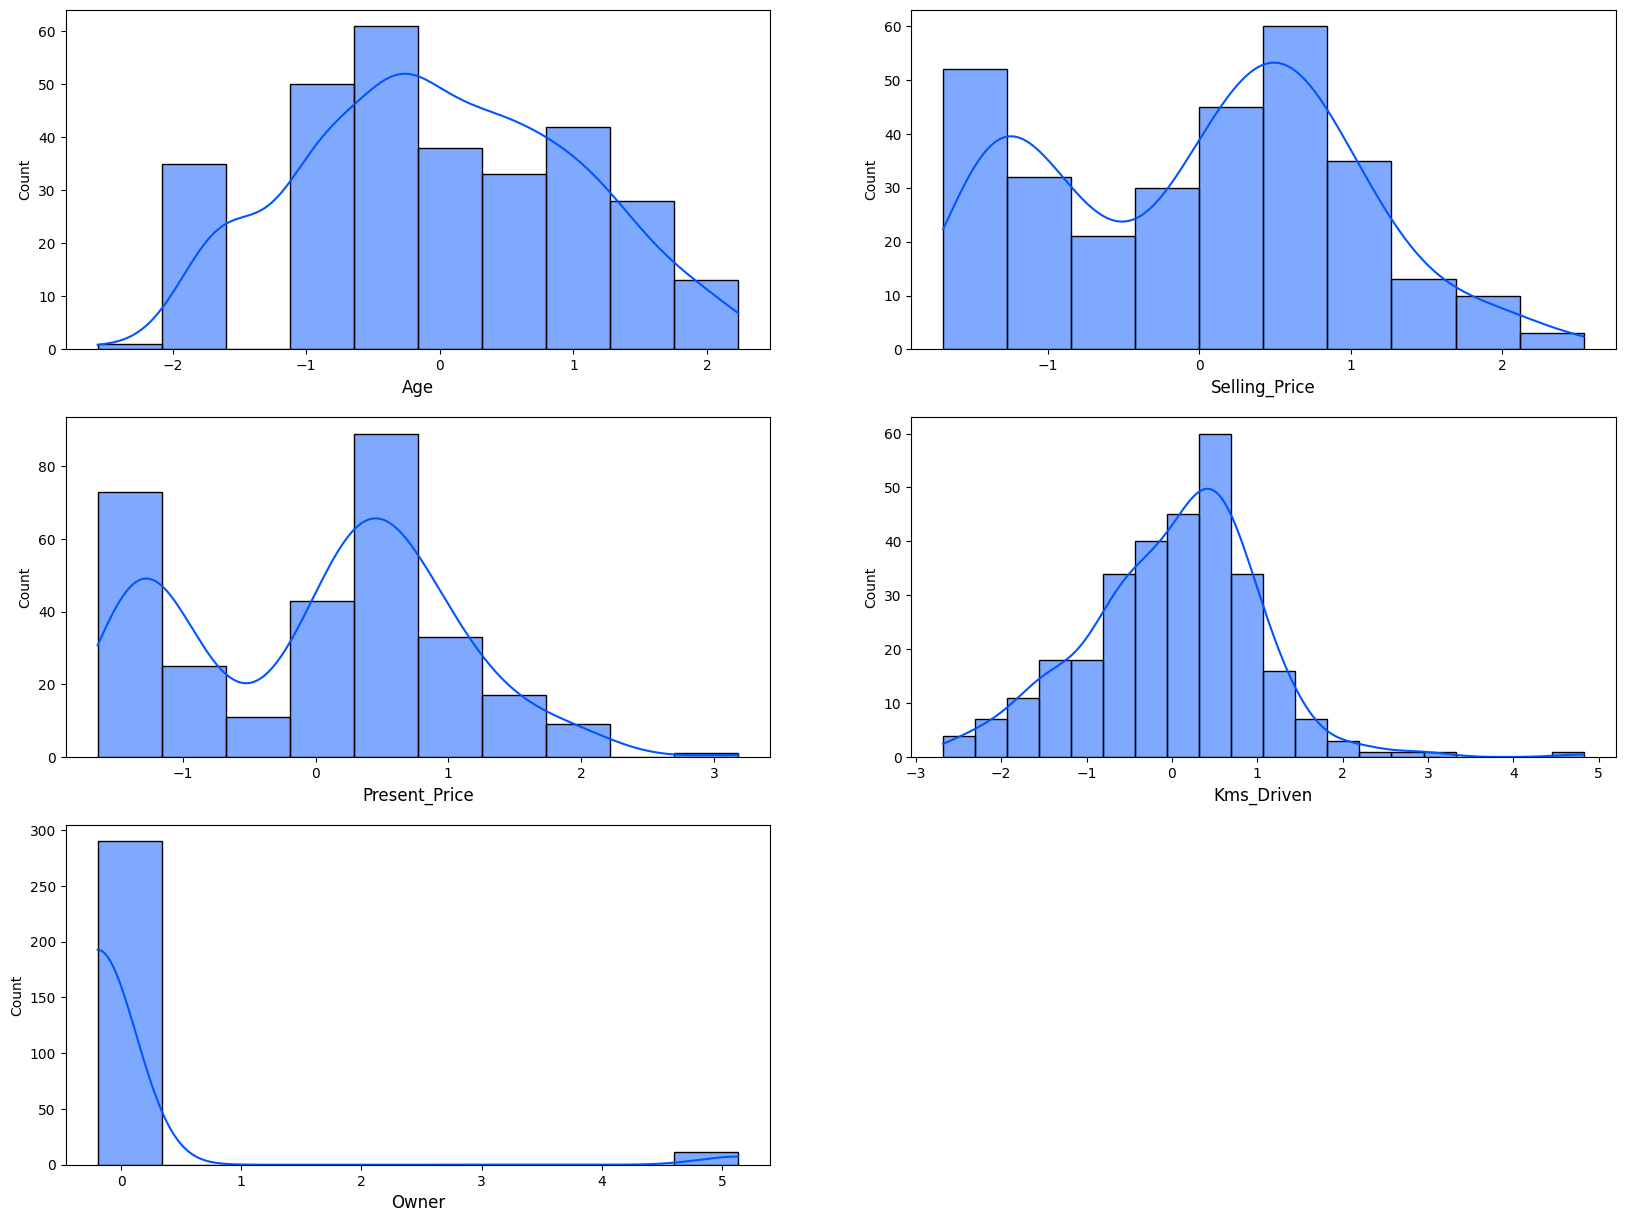

In [220]:
# owner has "0" values so we need to use a transformer that can handle "0"

# Use PowerTransformer to handle "0" values
pt = PowerTransformer(method='yeo-johnson')

# create a new dataframe to store the transformed data
df_transformed = df.copy()
df_transformed[numeric_data] = pt.fit_transform(df[numeric_data])

# check the skewness of the transformed data
for col in numeric_data:
    print(f'{col} = {df_transformed[col].skew()}')

# owner is still skewed

# plot a histogram of the transformed data
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_transformed[numeric_data].columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df_transformed[col], kde=True)
    plt.xlabel(col, fontsize=12)

# --------------------------------------------------------
## Scaling

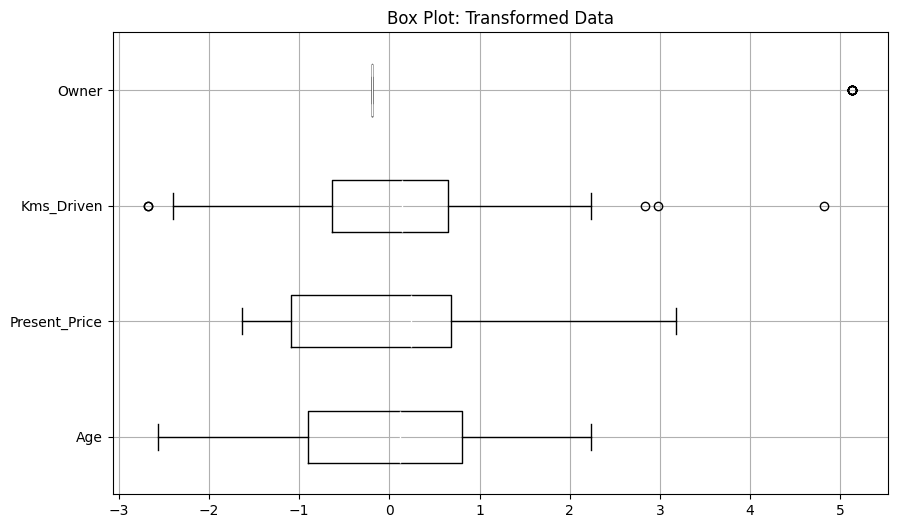

In [221]:
# box plots of the transformed data

fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df_transformed[numeric_features].boxplot(vert = False, ax=ax)  
_ = ax.set_title(f'Box Plot: Transformed Data')

In [222]:
# We want to scale the data to a range of 0 to 2
from sklearn.preprocessing import MinMaxScaler

# set up the scaler
scaler = MinMaxScaler(feature_range=(0, 2))
scaler.fit(df_transformed[numeric_data])

# transform the data
df_transformed[numeric_data] = scaler.transform(df_transformed[numeric_data])



#--------------------------------------------------------------------------------------------
# Other scalers that can be used are:

# MinMaxScaler (Features vary widely in scale but no strong outliers)
from sklearn.preprocessing import MinMaxScaler
df_.drop
df_ = df_transformed.copy()
scaler = MinMaxScaler(feature_range=(0, 2))
scaler.fit(df_[numeric_data])
df_[numeric_data] = scaler.transform(df_[numeric_data])

# StandardScaler (Data is normally distributed or close to it)
from sklearn.preprocessing import StandardScaler
df_ = df_transformed.copy()
scaler = StandardScaler()
df_[numeric_data] = scaler.fit_transform(df_[numeric_data])

# RobustScaler (data contains many outliers)
from sklearn.preprocessing import RobustScaler
df_ = df_transformed.copy()
scaler = RobustScaler()
df_[numeric_data] = scaler.fit_transform(df_[numeric_data])

# MaxAbsScaler (Data is sparse and already centered at 0)
from sklearn.preprocessing import MaxAbsScaler
df_ = df_transformed.copy()
scaler = MaxAbsScaler()
df_[numeric_data] = scaler.fit_transform(df_[numeric_data])

# QuantileTransformer (You want to remove the effects of outliers and make data more Gaussian)
from sklearn.preprocessing import QuantileTransformer
df_ = df_transformed.copy()
scaler = QuantileTransformer(n_quantiles=300 ,output_distribution='normal')  # 'normal' or 'uniform', n_quantiles is the number of entries
df_[numeric_data] = scaler.fit_transform(df_[numeric_data])

# PowerTransformer (Data is not normally distributed and has variance issues)
from sklearn.preprocessing import PowerTransformer
df_ = df_transformed.copy()
scaler = PowerTransformer(method='yeo-johnson')  # 'yeo-johnson' or 'box-cox' for positive data only
df_[numeric_data] = scaler.fit_transform(df_[numeric_data])



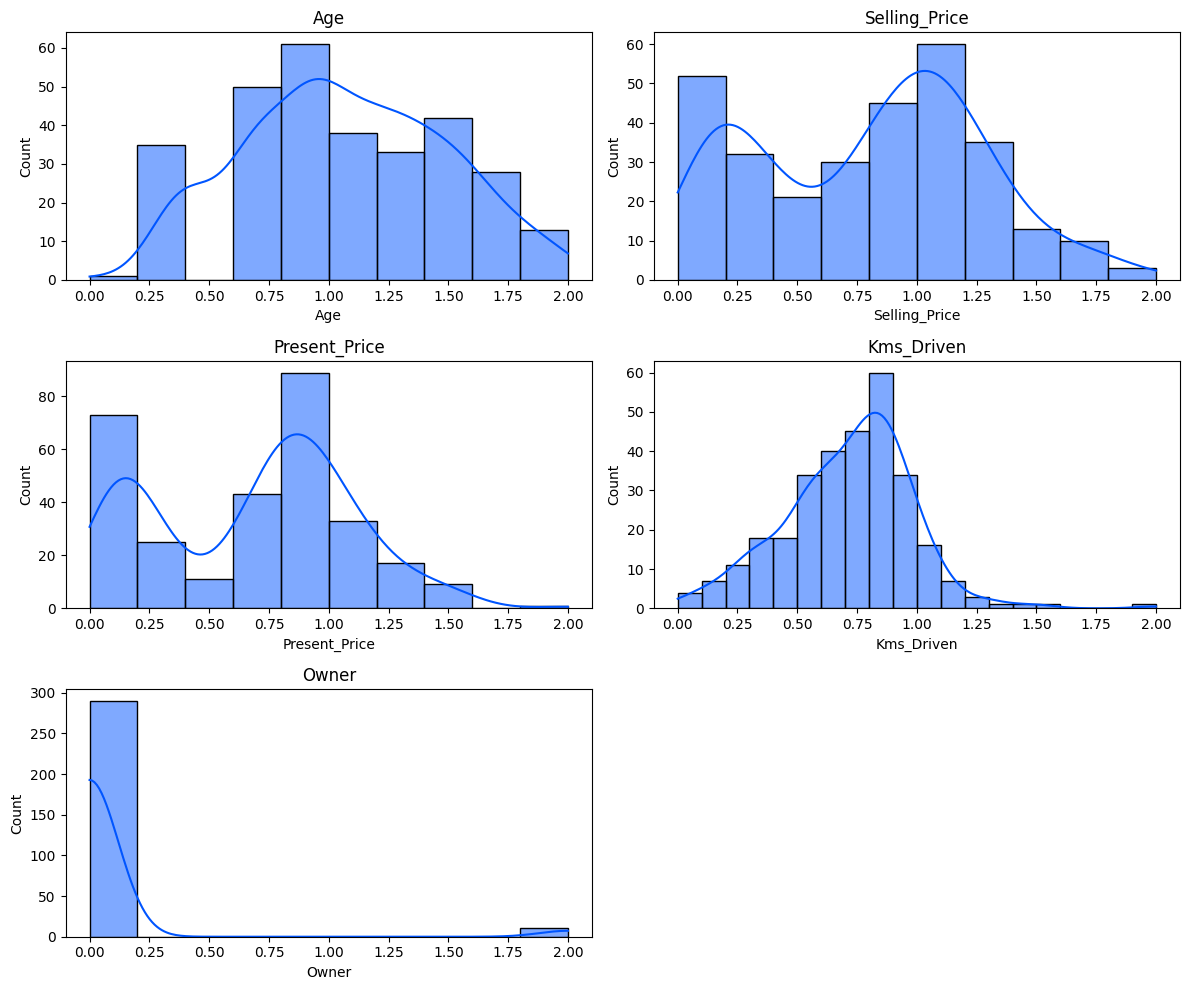

In [223]:
# Histogram of the transformed data
plt.figure(figsize=(12, 10))
for i, col in enumerate(df_transformed[numeric_data].columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df_transformed[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# Catagorical Features
## Encoding

In [224]:
print(f'Categorical Features: {categorical_features}')

# display the catagorical features
display(df[categorical_features].head())

for col in categorical_features:
    print(f"{col}: {df[col].unique().tolist()}")


Categorical Features: ['Fuel_Type', 'Seller_Type', 'Transmission']


,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


Fuel_Type: ['Petrol', 'Diesel', 'CNG']
Seller_Type: ['Dealer', 'Individual']
Transmission: ['Manual', 'Automatic']


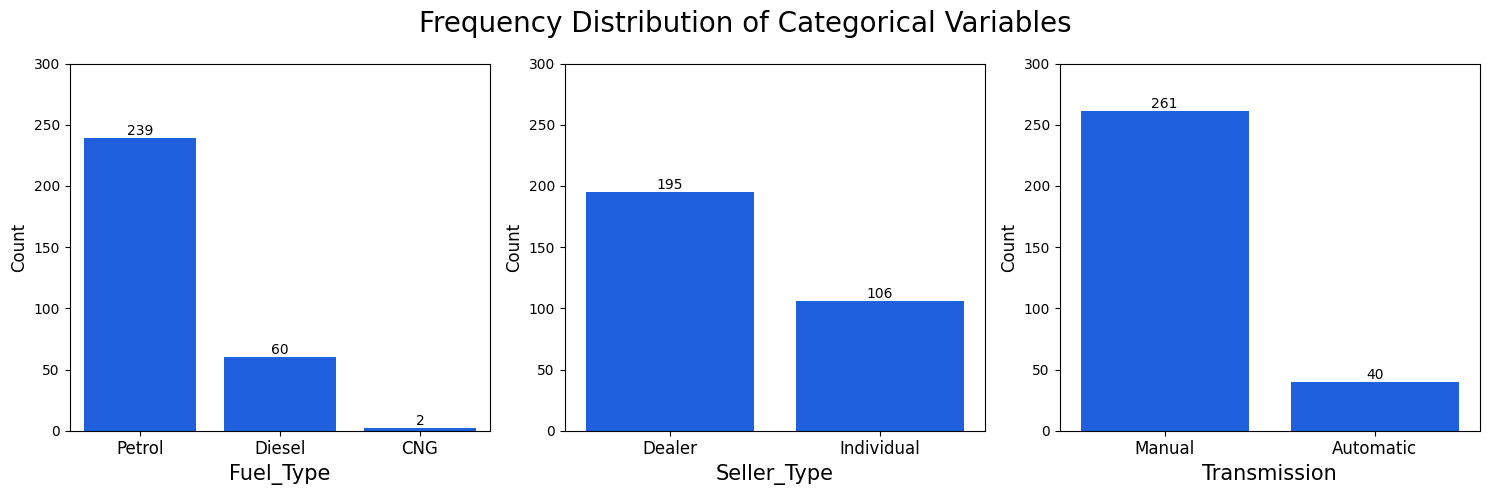

In [225]:
# Frequency of each category in the categorical features
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
       
for i in range(len(categorical_features)):
    graph = sns.countplot(x=categorical_features[i], data=df_transformed, ax=ax[i])
    ax[i].set_xlabel(categorical_features[i], fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0,300])
    ax[i].tick_params(axis='x', labelsize=12)
    for cont in graph.containers:
        graph.bar_label(cont)

plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20) 
plt.tight_layout()
plt.show()

Nominal Features so use one hot encoding (dummy encoding)

In [226]:
# one hot encoding of the categorical features
df_transformed = pd.get_dummies(df_transformed, columns=categorical_features, drop_first=True)

In [227]:
# check the new columns
df_transformed.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1.117662,0.847112,0.728084,0.701586,0.0,False,True,False,True
1,1.273454,1.009288,0.946691,0.845480,0.0,True,False,False,True
2,0.391361,1.214467,0.960274,0.371942,0.0,False,True,False,True
3,1.512453,0.775139,0.614405,0.317768,0.0,False,True,False,True
4,1.117662,0.994060,0.810390,0.841246,0.0,True,False,False,True


In [228]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     301 non-null    float64
 1   Selling_Price           301 non-null    float64
 2   Present_Price           301 non-null    float64
 3   Kms_Driven              301 non-null    float64
 4   Owner                   301 non-null    float64
 5   Fuel_Type_Diesel        301 non-null    bool   
 6   Fuel_Type_Petrol        301 non-null    bool   
 7   Seller_Type_Individual  301 non-null    bool   
 8   Transmission_Manual     301 non-null    bool   
dtypes: bool(4), float64(5)
memory usage: 13.1 KB


# --------------------------------------------------------
# Outlier Treatment